In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("sentiment_train.csv")

In [3]:
test=pd.read_csv("Sentiment_test.csv")

In [4]:
train['type']='train'
test['type']='test'
test['Is_Response']= "Find out"

In [5]:
df=pd.concat([train,test])
df.head()

,Browser_Used,Description,Device_Used,Is_Response,User_ID,type
0,Edge,The room was kind of clean but had a VERY stro...,Mobile,not happy,id10326,train
1,Internet Explorer,I stayed at the Crown Plaza April -- - April -...,Mobile,not happy,id10327,train
2,Mozilla,I booked this hotel through Hotwire at the low...,Tablet,not happy,id10328,train
3,InternetExplorer,Stayed here with husband and sons on the way t...,Desktop,happy,id10329,train
4,Edge,My girlfriends and I stayed here to celebrate ...,Tablet,not happy,id10330,train


In [6]:
df['Is_Response'].value_counts()

Find out     29404
happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68336 entries, 0 to 29403
Data columns (total 6 columns):
Browser_Used    68336 non-null object
Description     68336 non-null object
Device_Used     68336 non-null object
Is_Response     68336 non-null object
User_ID         68336 non-null object
type            68336 non-null object
dtypes: object(6)
memory usage: 3.6+ MB


In [8]:
df.isnull().sum()

Browser_Used    0
Description     0
Device_Used     0
Is_Response     0
User_ID         0
type            0
dtype: int64


So from the above we can see that the data is slight imbalanced but workable, and we don't have any null values.

And from the dataset we can observe that the their is no relation between ID, device_used or browser_used and reviews, affecting the outcome, so removed all unnecessary variables.

In [9]:
df.drop(['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

In [10]:
df['Is_Response'].replace({'not happy':0,'happy':1},inplace=True)

In [11]:

from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(b.isdigit() for b in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text)
df["Description"] = df["Description"].apply(lambda x: clean_text(x))

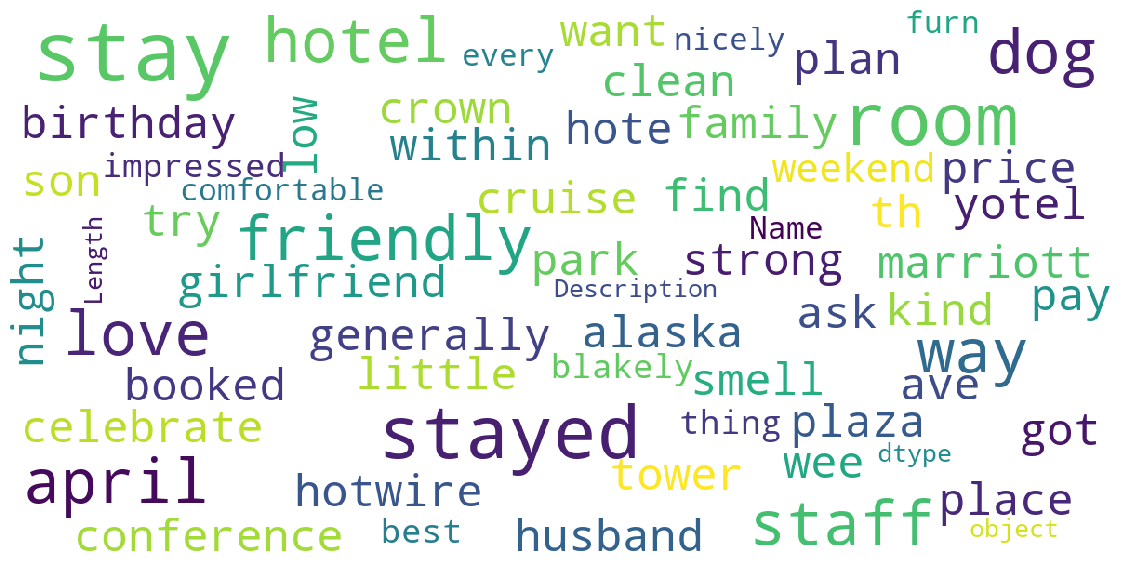

In [12]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 400,
        max_font_size = 30,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
wordcloud(df["Description"])

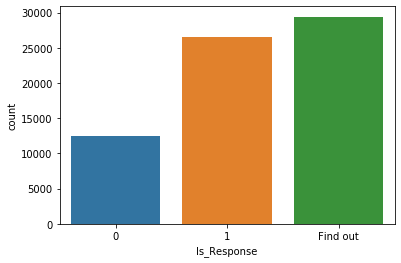

In [13]:
sns.countplot(df["Is_Response"])

In [14]:
Tf=df.loc[df['type']=='train']
Testf=df.loc[df['type']=='test']
Tf.drop(['type'],axis=1,inplace=True)
Testf.drop(['type'],axis=1,inplace=True)

In [15]:
Tf

,Description,Is_Response
0,room kind clean strong smell dog generally ave...,0
1,stay crown plaza april april staff friendly at...,0
2,booked hotel hotwire low price could find got ...,0
3,stayed husband son way alaska cruise love hote...,1
4,girlfriend stay celebrate th birthday plan wee...,0
...,...,...
38927,arrive late night walk check-in area completel...,1
38928,positive impression location public parking op...,0
38929,travel friend shop show location great best sa...,0
38930,experience ok pay extra view pool get view pal...,0


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

features = tf_vec.fit_transform(Tf['Description'])
test_features = tf_vec.fit(Testf['Description'])

X1 = features
x2 = test_features
y = Tf['Is_Response']
y=y.astype('int')

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X1,y,random_state=42)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [19]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=MultinomialNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [20]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('MultinomialNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.7866022809000308


Cross_Val_Score =  0.7912771911798505


roc_auc_score =  0.7074765896222687


classification_report
               precision    recall  f1-score   support

           0       0.75      0.49      0.59      3096
           1       0.80      0.92      0.86      6637

    accuracy                           0.79      9733
   macro avg       0.77      0.71      0.72      9733
weighted avg       0.78      0.79      0.77      9733



[[1517 1579]
 [ 498 6139]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf

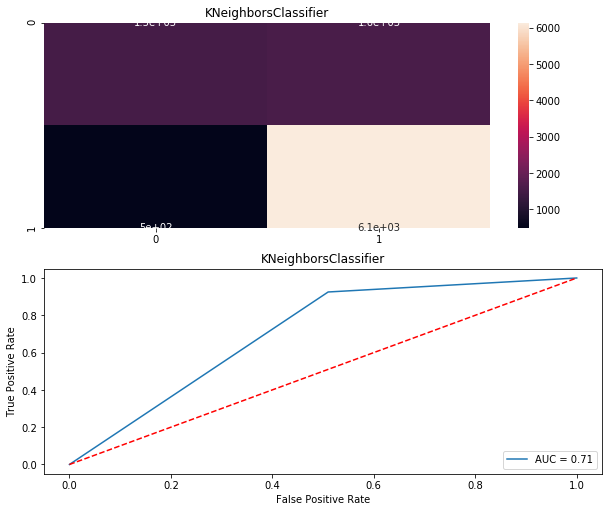

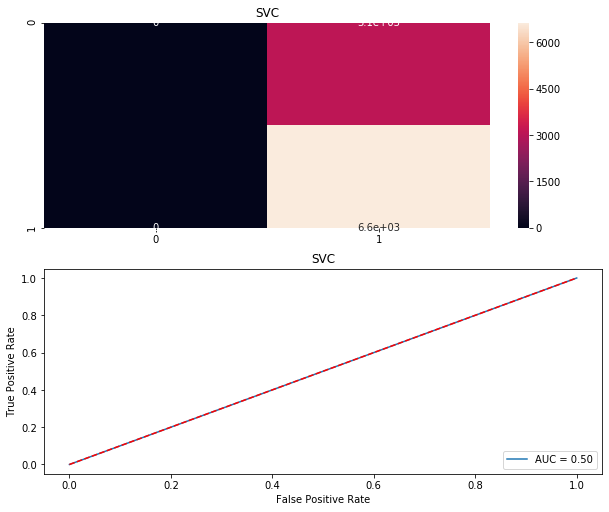

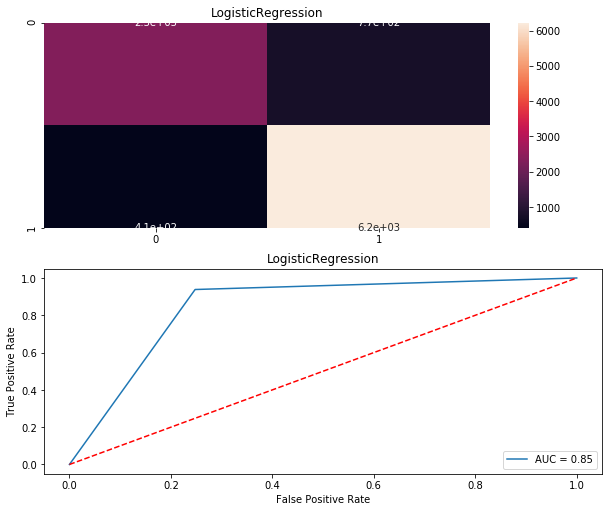

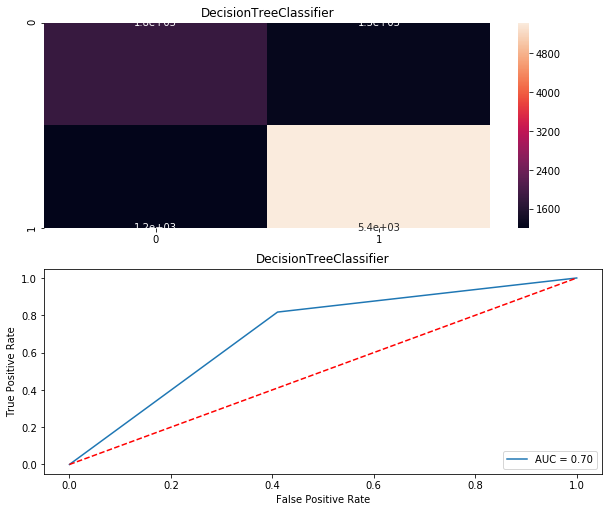

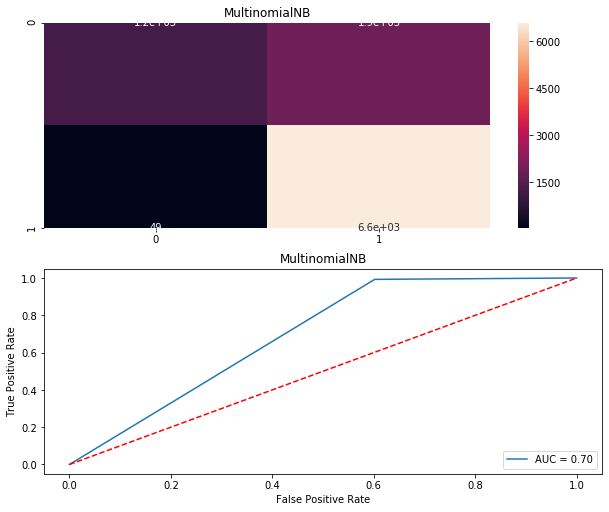

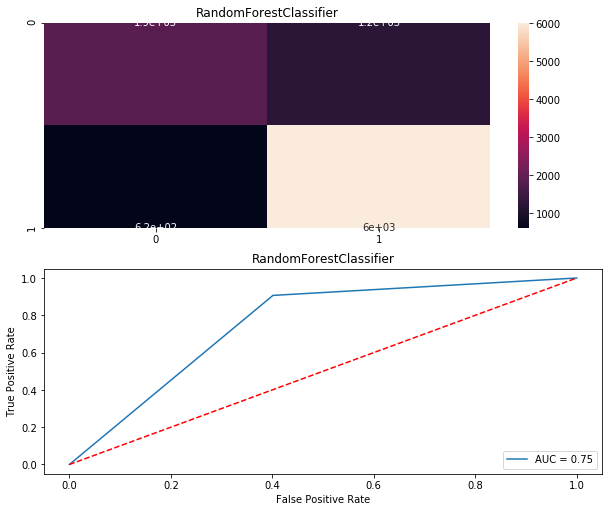

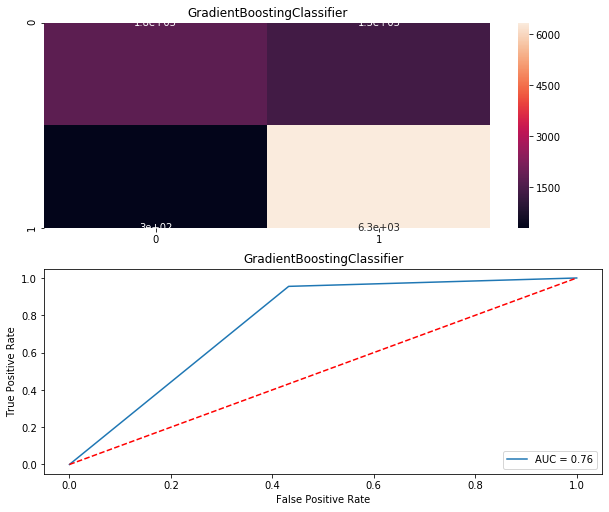

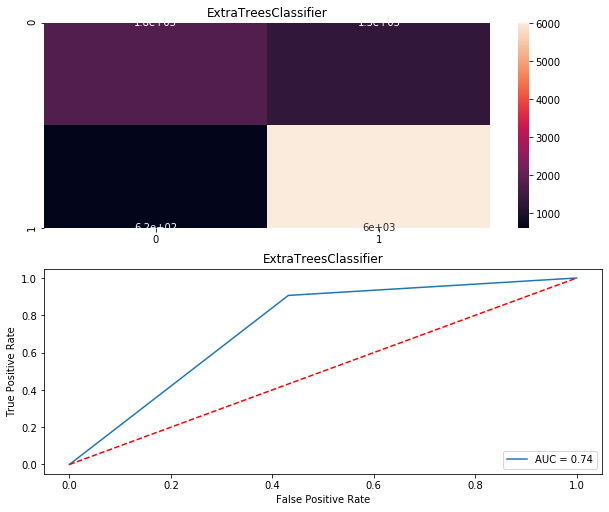

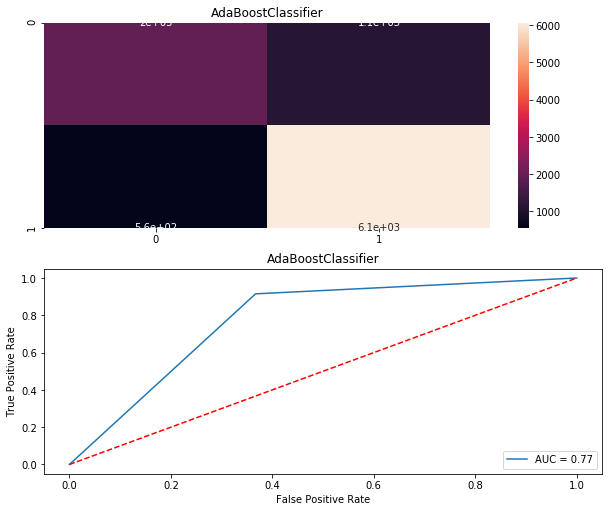

In [21]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, X1, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [22]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,78.660228,79.127719,70.747659
1,SVC,68.190691,68.121340,50.000000
2,LogisticRegression,87.907120,88.238484,84.524304
3,DecisionTreeClassifier,74.488852,74.401521,70.351499
4,MultinomialNB,80.355492,81.346979,69.543648
5,RandomForestClassifier,80.869208,80.501900,75.271075
6,GradientBoostingClassifier,83.191205,83.075623,76.146483
7,ExtraTreesClassifier,79.903421,80.399136,73.752988
8,AdaBoostClassifier,82.533648,82.572217,77.404839
